<a href="https://colab.research.google.com/github/Yosralla23/Yosralla23/blob/main/Sentiment_Analysis_for_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import plotly.express as px

In [8]:
data=pd.read_csv('Reviews.csv')

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31974 entries, 0 to 31973
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31974 non-null  int64  
 1   ProductId               31974 non-null  object 
 2   UserId                  31974 non-null  object 
 3   ProfileName             31971 non-null  object 
 4   HelpfulnessNumerator    31972 non-null  float64
 5   HelpfulnessDenominator  31972 non-null  float64
 6   Score                   31972 non-null  float64
 7   Time                    31972 non-null  float64
 8   Summary                 31972 non-null  object 
 9   Text                    31972 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


In [11]:
data.shape

(31974, 10)

In [12]:
fig_score=data['Score'].value_counts().reset_index()
fig_score.columns=['Score','Count']
fig_score=px.bar(fig_score,x='Score',y='Count',title='Count of Reviews')
fig_score.show()

In [13]:
example=data['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [14]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [15]:
token=nltk.word_tokenize(example)
token

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [16]:
#Part of speech
tagged=nltk.pos_tag(token)
tagged[:5]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ')]

In [17]:
'''
Take token and group them in chunks of texts
'''
entities= nltk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# **Vader Sentiment**

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
data['Text'].dropna(inplace=True)

In [21]:
result={}

for i, row in tqdm(data.iterrows(),total=len(data)):
    text=str(row['Text'])
    myid=row['Id']
    result[myid]=sia.polarity_scores(text)

  0%|          | 0/31974 [00:00<?, ?it/s]

In [22]:
#Stor in pandas dataframes
pd.DataFrame(result).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
29937,0.000,0.791,0.209,0.8910
29938,0.113,0.887,0.000,-0.3182
29939,0.018,0.755,0.228,0.9972
29940,0.016,0.826,0.158,0.9780


In [23]:
#Now we have sentiment score
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(data,how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31969,29937,0.000,0.791,0.209,0.8910,B000FDLAZ6,AZ5AK5C6ZP84S,Mark D. Griffis,0.0,0.0,5.0,1.326586e+09,Better Than Homemade Without the Time and Hassle,This soup mix makes a tasty addition to any mu...
31970,29938,0.113,0.887,0.000,-0.3182,B000FDLAZ6,AK6J92Q930IFO,"Mrs. M. ""Health Concerns""",0.0,0.0,3.0,1.324166e+09,green leafy vegetable,If you lack dark green vegetables this will su...
31971,29939,0.018,0.755,0.228,0.9972,B001I8EVZI,A3EUSH8DPW75LR,barry,11.0,11.0,5.0,1.306627e+09,Great coffee when the price is right,I love my coffee and have tried all the name b...
31972,29940,0.016,0.826,0.158,0.9780,B001I8EVZI,A3S3DNSUREE2NK,"Mistress of The Dark Path ""Suzie""",2.0,2.0,5.0,1.295827e+09,The best flavor for the price,Folgers classic roast has been my trusted bran...


<ipython-input-24-da7852bb92e9>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




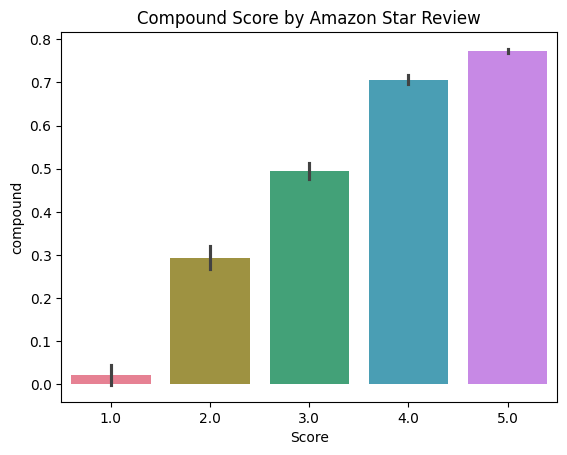

In [24]:
ax=sns.barplot(data=vaders, x='Score',y='compound',palette='husl')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

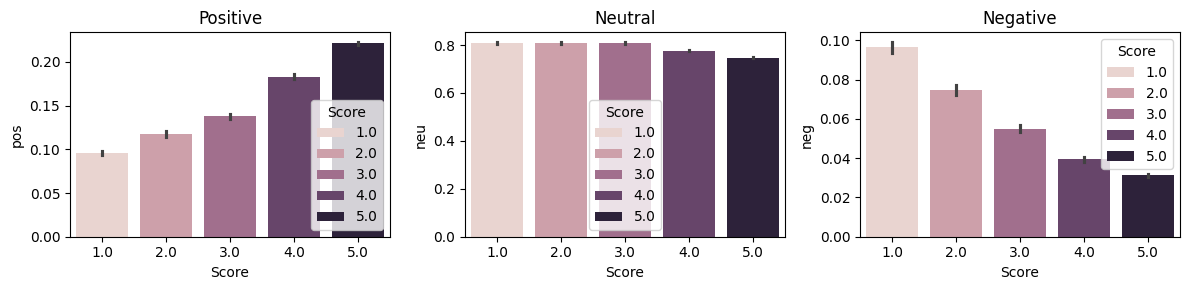

In [25]:
fig, axs= plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0],hue='Score')
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1],hue='Score')
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2],hue='Score')

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()
#

# **Roberta Pretrained Model**

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
model=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(model)
model=AutoModelForSequenceClassification.from_pretrained(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [28]:
encoded=tokenizer(example,return_tensors='pt')
output=model(**encoded)

#from tensor into numpy
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores

array([0.97635514, 0.02068746, 0.00295737], dtype=float32)

In [29]:
#Store negative,neutral, and positive in a dictionary
scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [30]:
def polarity_scores_roberta(example):
  encoded=tokenizer(example,return_tensors='pt')
  output=model(**encoded)

  #from tensor into numpy
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
  }

  return scores_dict


In [31]:
data=data.head(500)

In [35]:
result={}

for i, row in tqdm(data.iterrows(),total=len(data)):
  try:

    text=str(row['Text'])
    myid=row['Id']
    vader_result =sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_results=polarity_scores_roberta(text)
    #Combine both dictionaries Vader & Roberta
    both_models={**vader_result_rename, **roberta_results}
    result[myid]=both_models

  except RuntimeError:
      print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [37]:
result_df=pd.DataFrame(result).T
result_df=result_df.reset_index().rename(columns={'index':'Id'})
result_df=result_df.merge(data,how='left')

In [38]:
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## Combine and compare scores between models

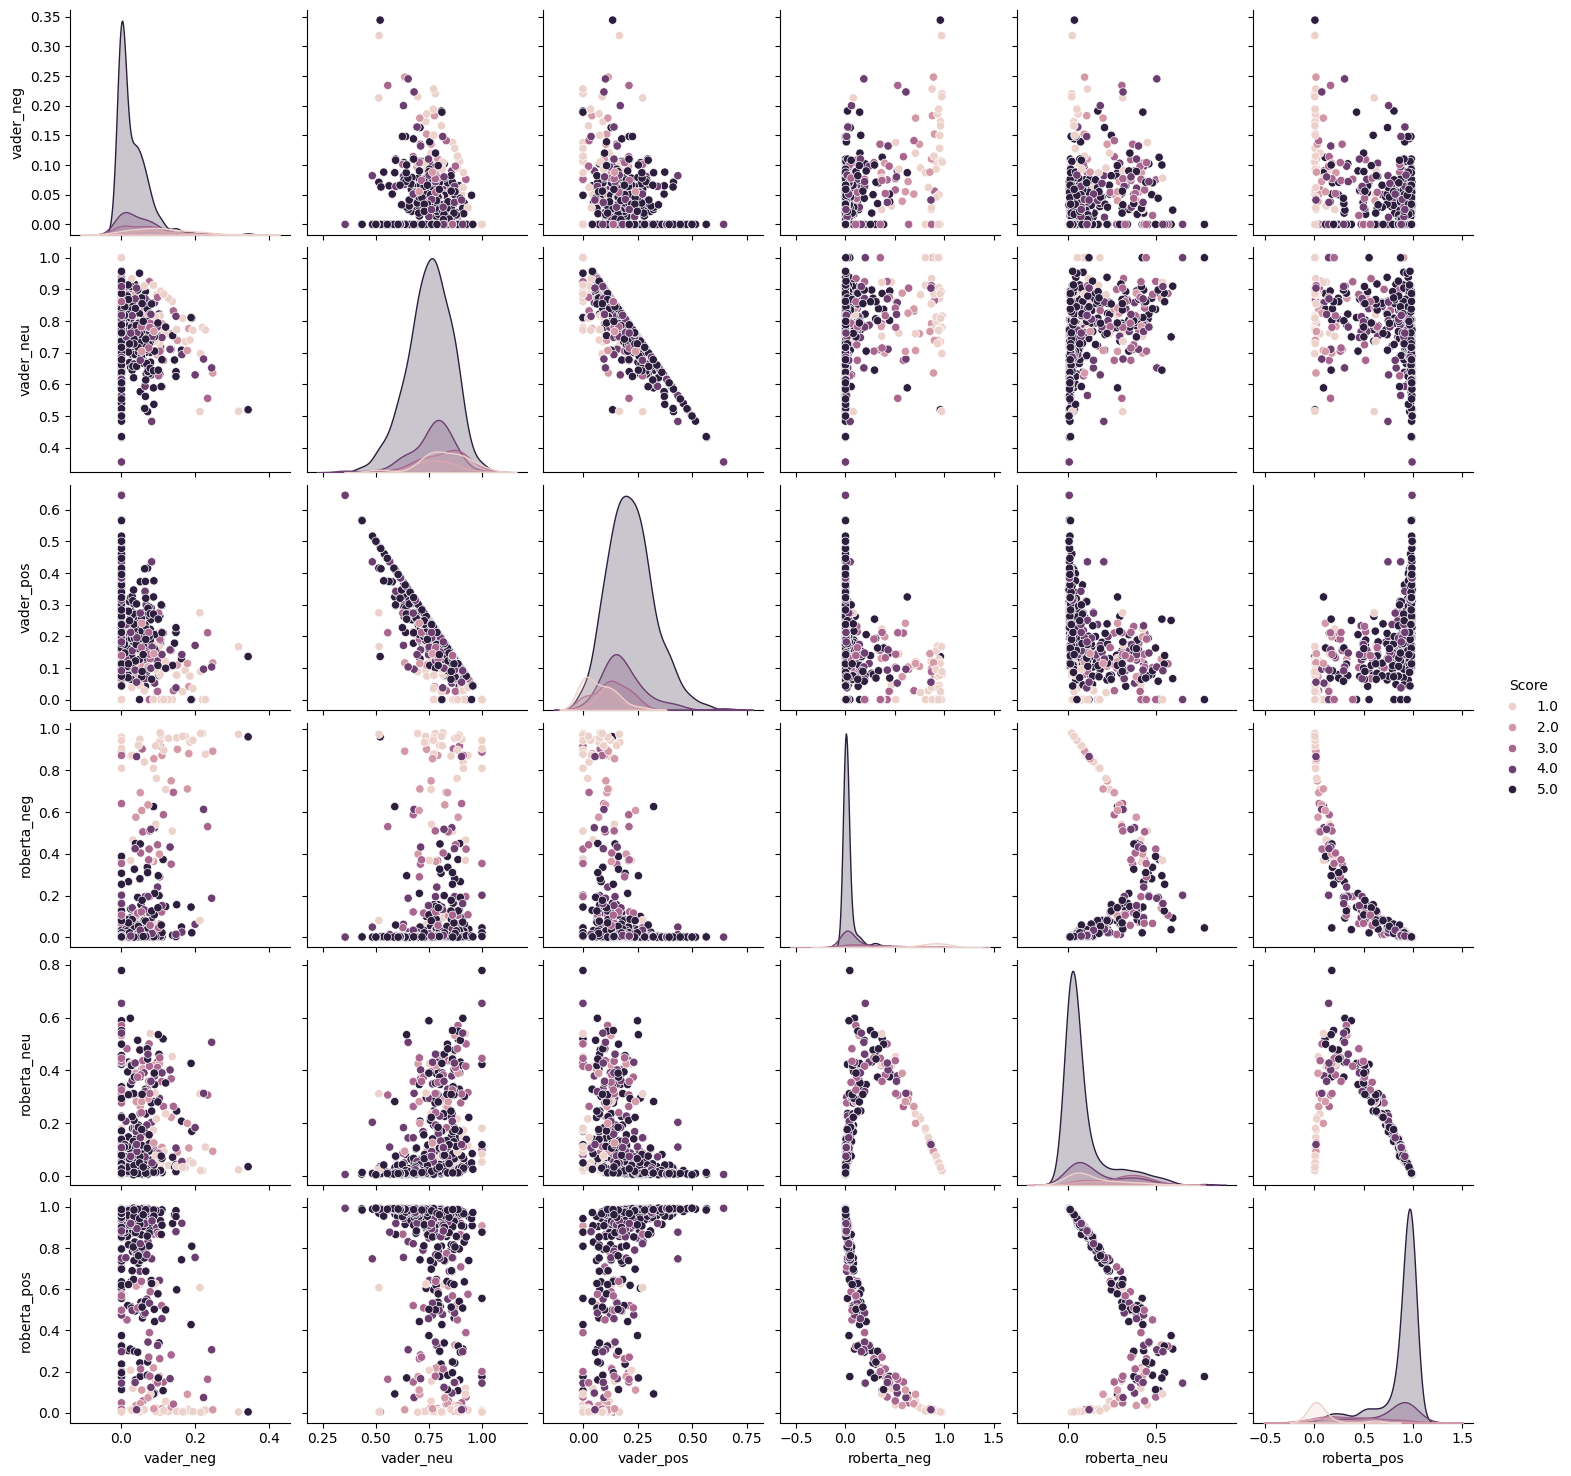

In [40]:
sns.pairplot(data=result_df,vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'], hue='Score')
plt.show()